## Import Libraries :

In [2]:
import numpy as np
import pickle
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from skimage import io

## Reading the dataset from Folder :

In [3]:
import os
data_path="Apple_Leaf_Disease_Dataset/color"
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print("Labels",labels)
print(categories)
print(label_dict)

Labels [0, 1, 2, 3]
['Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy']
{'Apple___Cedar_apple_rust': 0, 'Apple___Apple_scab': 1, 'Apple___Black_rot': 2, 'Apple___healthy': 3}


## Uploading the images and the labels :

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
images=[]
labels=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(label_dict[category])

In [5]:
print('Original Images : ',len(images))
print('Labels : ',len(labels))

Original Images :  3171
Labels :  3171


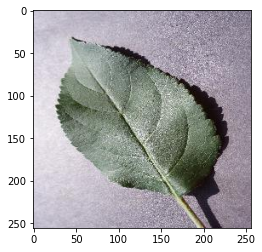

In [6]:
plt.imshow(images[3170])

## Enhancement technique :

In [13]:
CLAHE_images=[]
#img = cv2.imread('images/retina.jpg', 1)
for img in images:
    
#Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

#Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)

#plt.hist(l.flat, bins=100, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
    #equ = cv2.equalizeHist(l)

#plt.hist(equ.flat, bins=100, range=(0,255))
#Combine the Hist. equalized L-channel back with A and B channels
    #updated_lab_img1 = cv2.merge((equ,a,b))

#Convert LAB image back to color (RGB)
    #hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

###########CLAHE#########################
#Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2RGB)


    #cv2.imshow("Original
    #Original_images.append(img)
    
    #cv2.imshow("Equalized image", hist_eq_img)
    #hist_eq_images.append(hist_eq_img)
    #cv2.imshow('CLAHE Image', CLAHE_img)
    CLAHE_images.append(CLAHE_img)
    #cv2.waitKey(0)
#cv2.destroyAllWindows() 

In [14]:
print('Enhancement Images : ',len(CLAHE_images))
print('Labels : ',len(labels))

Enhancement Images :  3171
Labels :  3171


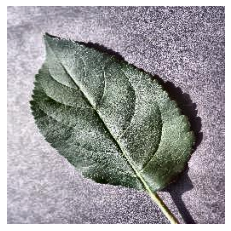

In [15]:
plt.imshow(CLAHE_images[3170])
plt.axis('off')
plt.show()

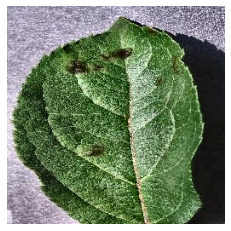

In [17]:
plt.imshow(CLAHE_images[317])
plt.axis('off')
plt.show()

## Segmentation using Kmeans Cluster :

In [13]:
segmented=[]
for image_or in range(len(CLAHE_images)):
    
    image_or = cv2.resize(CLAHE_images[image_or],(256,256))
    image2 = cv2.GaussianBlur(image_or,(5,5),0)
    image_f = np.array(image2)
    image = cv2.cvtColor(image2,cv2.COLOR_RGB2HSV)
    z = image.reshape((-1,3))
    Z = np.float32(z)
    cr = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,1.0)
    k = 2 
    ret,label,center = cv2.kmeans(Z,k,None,cr,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    res = np.array(res)
    res3 = res.reshape((image.shape))

    mask = cv2.inRange(res3, (0,100,0), (173, 255, 170))
    imask = mask>0
    green = np.zeros_like(image,np.uint8)
    green[imask] = image[imask]


    res4 = green
    for i in range(256):
        for j in range(256):
            for k in range(3):
                if ((res4[i][j][k] == 0 or res4[i][j][k] == 0 or res4[i][j][k] == 0)):
                    image_or[i][j][k]=0
    segmented.append(image_or)                 

In [15]:
print('Segmented1 Images : ',len(segmented))
print('Labels : ',len(labels))

Segmented1 Images :  3171
Labels :  3171


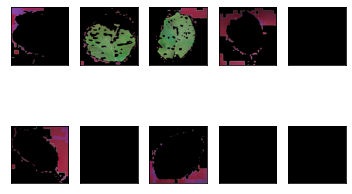

In [17]:
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(segmented[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

### To Save a image :
**for i in range(len(segmented1)):\
    plt.imsave('Apple Leaf Disease Dataset/Segmented_images/seg{}.png'.format(i),segmented1[i])**

## SURF Feature Extraction :

In [ ]:
path_1='0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_final_masked.jpg'

In [ ]:
i=cv2.imread(path_1)
g=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)

In [34]:
surf = cv2.xfeatures2d.SURF_create()

In [35]:
sf_seg_img =[]
for sf_img in segmented1:
    keypoints,descriptors=surf.detectAndCompute(sf_img,None)
    img=cv2.drawKeypoints(sf_img,keypoints,None)
    sf_seg_img.append(img)

In [36]:
print('Surf Segmented Images : ',len(sf_seg_img))
print('Labels : ',len(labels))

Surf Segmented Images :  3171
Labels :  3171


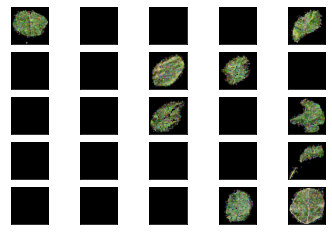

In [37]:
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(sf_seg_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

In [15]:
sf_seg_img[1].shape

(256, 256, 3)

In [39]:
data=np.array(sf_seg_img)/255.0 #convert the pixel range to 0 and 1
data=np.reshape(data,(data.shape[0],data.shape[1],data.shape[2],data.shape[3])) #reshape into 4-D because neural network needs a 4-D array
target=np.array(labels)

In [40]:
data.shape

(3171, 256, 256, 3)

In [41]:
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [42]:
print('data Images : ',len(data))
print('target Labels : ',len(new_target))

data Images :  3171
target Labels :  3171


## Build CNN Structure :

In [43]:
model = Sequential()
inputShape = (256, 256, 3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (256, 256, 3)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

## Adam Optimization :

In [47]:
opt = Adam(learning_rate=0.001, 
           beta_1=0.9, 
           beta_2=0.999, 
           epsilon=1e-07, 
           amsgrad=False)

## Compile Model :

In [48]:
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

## Split the dataset

In [49]:
from sklearn.model_selection import train_test_split
train_Data,test_Data,train_Target,test_Target=train_test_split(data,new_target,test_size=0.2)

## Data Augmentation :

In [50]:
epoch = 30
bs=32
augmentation = ImageDataGenerator(rotation_range=20,
                                 zoom_range=0.15,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.15,
                                 horizontal_flip=True,
                                 fill_mode='nearest') 

## train the model

In [52]:
history = model.fit_generator(
    augmentation.flow(train_Data, train_Target, batch_size=bs),
    validation_data=(test_Data, test_Target),
    steps_per_epoch=len(train_Data) // bs,
    epochs=epoch, verbose=1
    )

Epoch 1/5
79/79 [==============================] - 2145s 27s/step - loss: 0.6609 - accuracy: 0.7719 - val_loss: 2.3568 - val_accuracy: 0.7598
Epoch 2/5
79/79 [==============================] - 2104s 27s/step - loss: 0.5463 - accuracy: 0.7817 - val_loss: 0.5918 - val_accuracy: 0.7555
Epoch 3/5
79/79 [==============================] - 2081s 26s/step - loss: 0.4957 - accuracy: 0.8017 - val_loss: 2.1510 - val_accuracy: 0.5945
Epoch 4/5
79/79 [==============================] - 2044s 26s/step - loss: 0.4842 - accuracy: 0.8039 - val_loss: 4.2363 - val_accuracy: 0.5913
Epoch 5/5
79/79 [==============================] - 2099s 27s/step - loss: 0.5247 - accuracy: 0.7978 - val_loss: 5.2745 - val_accuracy: 0.5913


acc = history.history['accuracy']
val_acc = history.history['validation accuracy']
loss = history.history['loss']
val_loss = history.history['validation_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

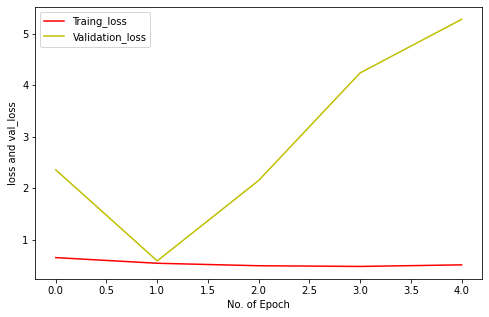

In [56]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],'r',label='Traing_loss')
plt.plot(history.history['val_loss'],'y',label='Validation_loss')
plt.xlabel('No. of Epoch')
plt.ylabel("loss and val_loss")
plt.legend()
plt.show()

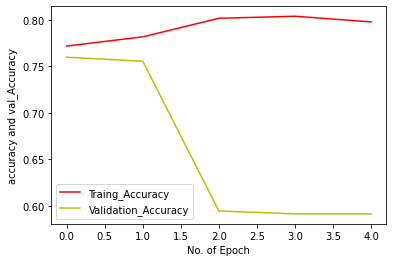

In [57]:
plt.plot(history.history['accuracy'],'r',label='Traing_Accuracy')
plt.plot(history.history['val_accuracy'],'y',label='Validation_Accuracy')
plt.xlabel('No. of Epoch')
plt.ylabel("accuracy and val_Accuracy")
plt.legend()
plt.show()

In [58]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_Data,test_Target)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
635/635 [==============================] - 210s 331ms/step
Test Accuracy: 59.1338574886322


In [ ]:
pickle.dump(model,open('cnn_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('cnn_model.pkl', 'rb'))

In [ ]:
image_dir=""

im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)

In [ ]:
result=model.predict(npp_image)

print(result)

In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])